# Análise exploratória de dados - GamersClub CS:GO

In [33]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')


C:\Users\Daniel\AppData\Local\Temp\ipykernel_88216\34928153.py:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



## Introdução

O jogo Counter-Strike Global Offensive, mais conhecido como CSGO, é um jogo de tiro em primeira pessoa (First Person Shooter), em que partidas são realizadas entre equipes de 5 jogadores cada. O jogo acaba quando uma das equipes ganha 16 rodadas. No caso de empate (por um placar de 15x15), são jogadas prorrogações com 6 rodadas até que uma das equipes ganhe 4 de 6 rodadas. O jogo compõe parte importante do cenário de esporte eletrônico, sendo acompanhado diariamente por milhares de espectadores em todos os países do mundo, apresentando cada vez mais espectadores no Brasil e atraindo uma quantidade considerável de investimentos.

A *GamersClub* é uma plataforma digital brasileira que tem como objetivo prover o serviço de criação de partidas para o CSGO, além de promover competições profissionais e aulas para aqueles que pagam pela assinatura do serviço.

O *dataset* utilizado nesse trabalho foi disponibilizado pela própria plataforma da *GamersClub* a partir do site do *Kaggle*. Esse conjunto de dados apresenta as informações de partidas jogadas por membros da plataforma, contendo informações de mais de 150 mil partidas. O mesmo pode ser obtido a partir do seguinte [endereço](https://www.kaggle.com/datasets/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club)

Os dados são apresentados de forma que cada linha represente uma partida de um determinado jogador. Dessa forma, todas as análises são feitas a nível individual, ou seja, não são analisados os dados de equipes, mas de jogadores. O conjunto de dados em si representa uma amostragem aleatória da plataforma. Nesse caso, a população analisada é o conjunto de **todos** os jogadores que participam da plataforma.

### Glossário

Utilitárias: elementos táticos do jogo, como:
- Granadas de fumaça, utilizadas para impedir a visão do time adversário
- Granada de fragmentação, utilizada para causar dano direto ao adversário através de explosão, sendo esse dano inversamente proporcional à distância da explosão para o jogador
- Granada incendiária, utilizada para impedir que jogadores adversários avancem sobre uma determinada região do mapa

ADR (*Average Damage per Round*): dano médio por rodada. Isto é, quanto um determinado jogador causou de dano na equipe inimiga a cada rodada, em média. Um jogador pode causar dano em um adversário a partir do uso de armas ou utilitárias (granadas).

HS (*Headshot*): um tiro que atinge a cabeça de um adversário. Estatística importante, pois é uma das maneiras mais eficientes de causar dano no adversário. À depender do armamento utilizado, causa uma eliminação instantânea.

## Parte 0: qualidade dos dados

In [2]:
lobby_players = pd.read_csv('data/tb_lobby_stats_player.csv')

In [3]:
lobby_players.head(10)

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45
5,5,2,5,10,1,11,5,0,3,0.0,...,1.0,5.0,6.0,8.0,0.0,0.0,3.0,0.0,1,2021-09-29 22:05:47
6,5,1068,69976,9,2,19,4,1,0,0.0,...,1.0,6.0,21.0,14.0,3.0,4.0,2.0,2.0,0,2021-09-29 22:05:47
7,6,2,6,16,1,23,9,0,1,0.0,...,1.0,9.0,21.0,19.0,3.0,4.0,2.0,3.0,0,2021-10-07 22:48:43
8,7,2,7,11,2,19,2,0,1,0.0,...,1.0,5.0,17.0,12.0,0.0,4.0,0.0,2.0,0,2021-10-08 23:29:57
9,8,2,8,8,6,13,2,0,0,0.0,...,0.0,3.0,9.0,17.0,2.0,5.0,7.0,8.0,0,2021-10-12 16:48:09


In [4]:
# count lines
print('Number of lines: ', len(lobby_players))
# check if all (idLobbyGame, idPlayer) are unique
print('Number of unique (idLobbyGame, idPlayer) pairs: ', len(lobby_players.groupby(['idLobbyGame', 'idPlayer']).size()))
# check if all (idRoom, idPlayer) are unique
print('Number of unique (idRoom, idPlayer) pairs: ', len(lobby_players.groupby(['idRoom', 'idPlayer']).size()))
# USAR APENAS O LOBBYGAME

Number of lines:  184152
Number of unique (idLobbyGame, idPlayer) pairs:  184152
Number of unique (idRoom, idPlayer) pairs:  184152


In [5]:
lobby_players['idLobbyGame'].value_counts().sort_values(ascending=False).head(10)

58891    5
60420    4
17782    4
17622    4
71305    4
93223    4
17777    4
4508     4
17644    3
31686    3
Name: idLobbyGame, dtype: int64

In [6]:
lobby_players['idRoom'].value_counts().sort_values(ascending=False).head(10)

17861    3
17801    3
17818    3
17817    3
17858    3
17876    3
58765    3
24323    3
17887    3
17889    3
Name: idRoom, dtype: int64

Conforme os dados acima, nota-se que não será possível realizar uma análise por equipes, uma vez que partidas com múltiplos jogadores simultâneas são escassas. Desta forma, a análise proposta tem como alvo principal o jogador individualmente, explorando informações como mapas, nível na GC, quantidade de eliminações, mortes e assistências, entre outras.

## Parte 1: players

In [7]:
players = pd.read_csv('data/tb_players.csv')

In [8]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idPlayer        2716 non-null   int64 
 1   flFacebook      2716 non-null   int64 
 2   flTwitter       2716 non-null   int64 
 3   flTwitch        2716 non-null   int64 
 4   descCountry     2716 non-null   object
 5   dtBirth         2008 non-null   object
 6   dtRegistration  2716 non-null   object
dtypes: int64(4), object(3)
memory usage: 148.7+ KB


In [9]:
players.head(10)

,idPlayer,flFacebook,flTwitter,flTwitch,descCountry,dtBirth,dtRegistration
0,1,0,0,0,cl,NaN,2021-03-19 21:31:39
1,2,0,0,0,br,NaN,2020-05-06 19:28:29
2,3,0,0,0,br,NaN,2020-01-28 13:00:38
3,4,0,0,0,br,NaN,2017-05-31 16:13:51
4,5,0,0,0,ar,NaN,2021-02-08 11:57:21
5,6,0,0,0,br,2002-03-23 00:00:00,2019-01-09 19:24:27
6,7,0,0,0,br,NaN,2020-04-24 22:53:50
7,8,0,0,0,br,NaN,2021-06-26 14:47:57
8,9,0,0,0,ar,2000-05-03 00:00:00,2016-05-22 15:12:48
9,10,0,0,0,br,2005-04-15 00:00:00,2018-02-28 11:29:11


In [10]:
print(players['flFacebook'].value_counts())
print(players['flTwitter'].value_counts())
print(players['flTwitch'].value_counts())

0    2653
1      63
Name: flFacebook, dtype: int64
0    2672
1      44
Name: flTwitter, dtype: int64
0    2663
1      53
Name: flTwitch, dtype: int64


Explicação das colunas:
* ``idPlayer``: id do player
* ``flFacebook``, ``flTwitter``, ``flTwitch``: se o jogador sincronizou (1) ou não (0) sua conta com cada uma das plataformas
* ``descCountry``: sigla de dois dígitos indicando o país do jogador
* ``dtRegistration``: data de ingresso do jogador na plataforma GamersClub

In [11]:
players['descCountry'].isna().sum()

0

Ou seja, todos os players tem um país.

In [12]:
countries_count = players['descCountry'].value_counts()
freq_countries = countries_count[countries_count > 100]
freq_countries

br    2071
ar     491
Name: descCountry, dtype: int64

In [13]:
# Plot to donut chart
fig = px.pie(countries_count, values=countries_count.values, names=countries_count.index, title='Países')
fig.update_traces(textposition='inside', textinfo='percent+label')
# # add hole
fig.update_traces(hole=.6, hoverinfo="label+percent+name")
fig.show()


In [20]:
# # Calculate the age of the players
players['age'] = (dt.datetime.now() - pd.to_datetime(players['dtBirth'])).astype('<m8[Y]')

In [76]:
# Histogram of player age
# Distribution curve over histogram
# Preparing data
x = np.array(players['age'])
# Remove NaN values
x = x[~np.isnan(x)]
# Remove x bigger than 47
x = x[x < 47]
# Limit n bins to 20
fig = ff.create_distplot([x], ['Idade dos jogadores'], bin_size=1, show_rug=False, histnorm='probability', curve_type='normal')
# fig width = 400px
fig.update_layout(width=800)
# Graph title = "Distribuição de idade dos jogadores da plataforma Gamers Club"
fig.update_layout(title='Distribuição de idade dos jogadores da plataforma Gamers Club')
# Set bar colors to cyan
fig.update_traces(marker_color='#393E46')
# Set curve color to red
fig.update_traces(selector=dict(type='histogram'), marker_color='orange')
fig.show()

**Nota: barras do histograma limitadas à 20. Isso causou a remoção dos outliers: jogadores mais velhos que 45 anos. Haviam apenas 8.**

In [16]:
lobby_players['qtTk'].sort_values(ascending=False).head(10)

162076    12.0
22986      5.0
65498      4.0
70875      4.0
18990      3.0
27468      3.0
49793      3.0
47274      3.0
161430     3.0
38089      3.0
Name: qtTk, dtype: float64

## Parte 2: resto das coisas

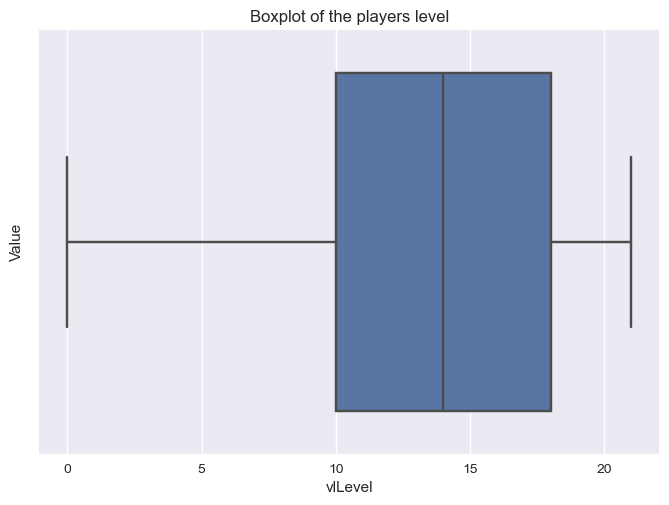

In [17]:
# Assuming your dataframe is called 'df'
sns.boxplot(x=lobby_players['vlLevel'])

# Add title and labels
plt.title('Boxplot of the players level')
#plt.xlabel('vlLevel')
plt.ylabel('Value')

# Show the plot
plt.show()


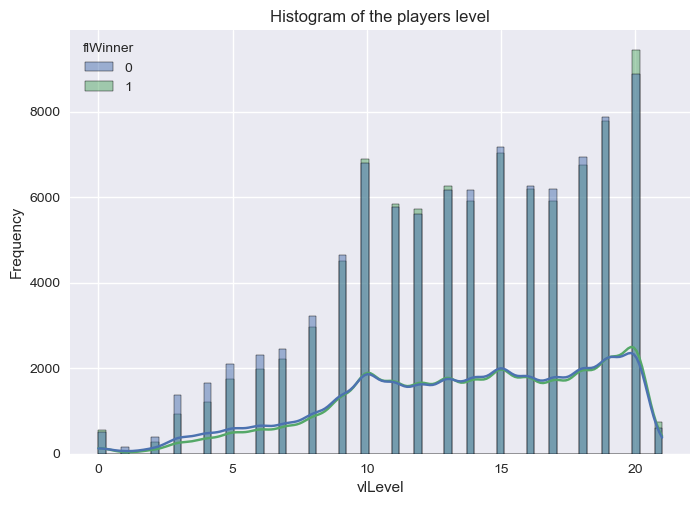

In [18]:
sns.histplot(data=lobby_players, x='vlLevel', kde=True, hue = 'flWinner')

#Add title and labels
plt.title('Histogram of the players level')
plt.xlabel('vlLevel')
plt.ylabel('Frequency')

#Show the plot
plt.show()

In [19]:
#sample = lobby_players.sample(5000)

#sns.pairplot(sample)